#Prédiction du risque de crédit avec les arbres de décision

Ce notebook met en œuvre un classificateur d'arbre de décision pour prédire le risque de crédit en fonction de diverses caractéristiques des demandeurs. Il charge un ensemble de données contenant des informations sur les demandeurs de crédit, encode les variables catégorielles, sélectionne les caractéristiques pertinentes et divise les données en ensembles d'entraînement et de test. Le modèle d'arbre de décision est entraîné sur les données d'entraînement et évalué à l'aide de métriques de précision. Enfin, l'arbre de décision est visualisé pour faciliter son interprétation. L'objectif est de développer un modèle précis et interprétable pour évaluer le risque de crédit, aidant ainsi dans les processus de prise de décision liés à l'évaluation du crédit.

#Import necessary libraries

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt

#Load data from CSV without header, Define and Assign column names

In [ ]:
data = pd.read_csv('/content/german_credit_data.csv', header=None, skiprows=1)
column_names = ['Status of existing checking account', 'Duration in month', 'Credit history', 'Purpose', 'Credit amount', 'Savings account/bonds', 'Present employment since', 'Installment rate in percentage of disposable income', 'Personal status and sex', 'Other debtors / guarantors', 'Present residence since', 'Property', 'Age in years', 'Other installment plans', 'Housing', 'Number of existing credits at this bank', 'Job', 'Number of people being liable to provide maintenance for', 'Telephone', 'foreign worker', 'class']
data.columns = column_names

# Encode categorical variables and Select relevant features

In [ ]:
cat_cols = ['Status of existing checking account', 'Credit history', 'Purpose', 'Savings account/bonds', 'Present employment since', 'Personal status and sex', 'Other debtors / guarantors', 'Property', 'Other installment plans', 'Housing', 'Job', 'Telephone', 'foreign worker', 'class']
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])
selected_cols=['Credit history', 'Credit amount', 'Installment rate in percentage of disposable income', 'Present employment since']
X = data[['Credit history', 'Credit amount', 'Installment rate in percentage of disposable income', 'Present employment since']]
y = data['class']

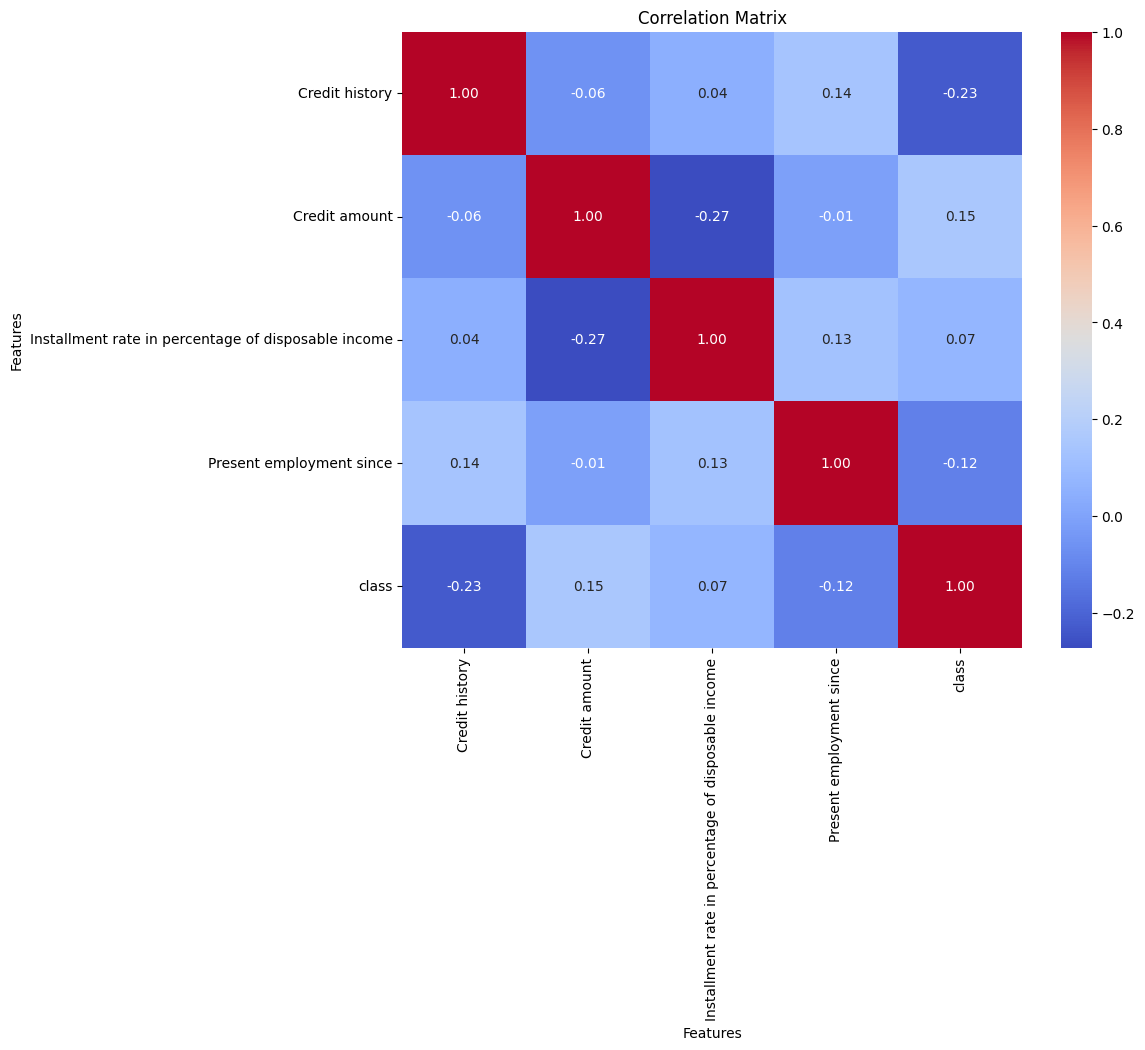

In [ ]:
# Correlation analysis
correlation_matrix = data[selected_cols + ['class']].corr()

# Heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()



# Split data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train decision tree model and Make predictions on test set

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

# Evaluate model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.71
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.94      0.82       141
           1       0.53      0.15      0.24        59

    accuracy                           0.71       200
   macro avg       0.63      0.55      0.53       200
weighted avg       0.67      0.71      0.65       200



# Visualize decision tree

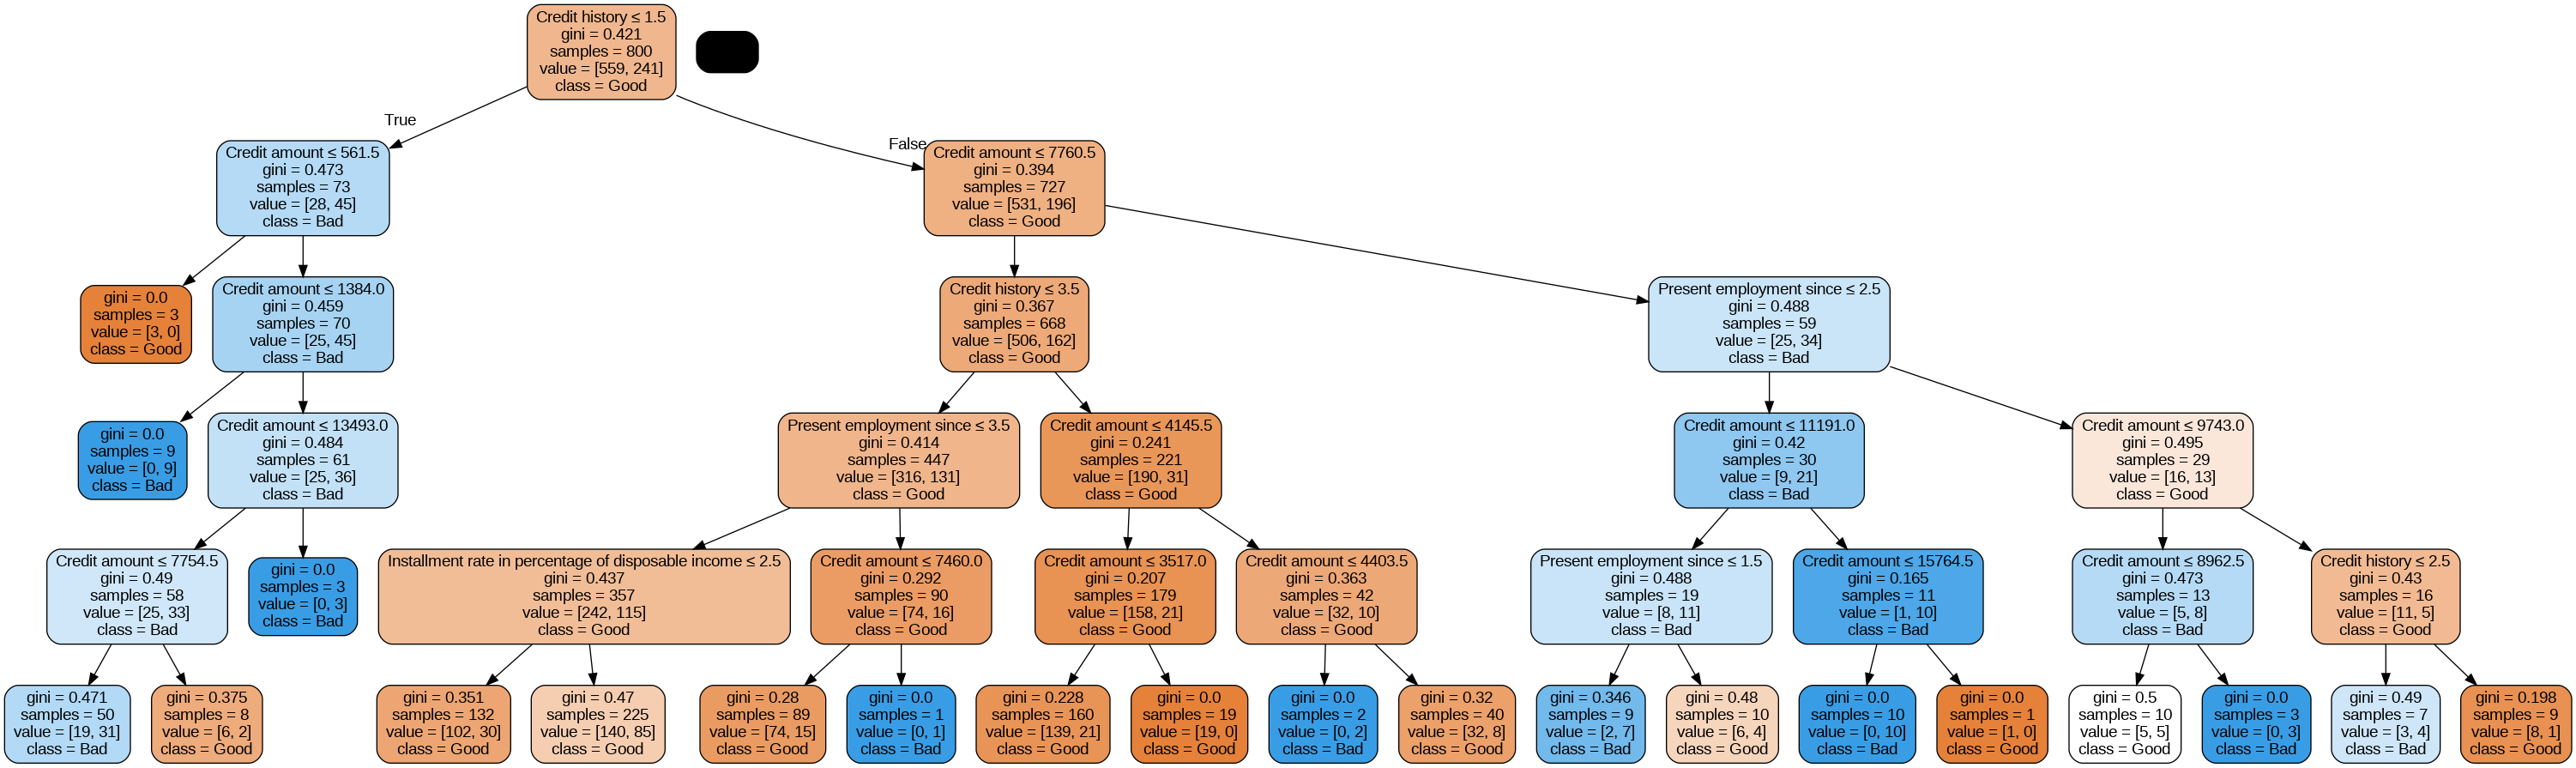

In [ ]:
dot_data = export_graphviz(dt_model, out_file=None, feature_names=X.columns, class_names=['Good', 'Bad'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

##Les principaux facteurs qui semblent influencer le plus la classification sont :

* Le montant du crédit demandé : Des montants plus élevés (supérieurs à 7700 ou 5561) sont généralement associés à un risque plus élevé.
* L'historique de crédit : Un historique médiocre (rating <=0.42) est un indicateur clé de risque "Mauvais".
* La durée de l'emploi actuel : Une durée inférieure à 2,5 ou 3,5 ans est souvent liée à un risque "Mauvais".
* Installment rate : Installment rate élevé (supérieur à 22,5% ou 42,7%) augmente les chances d'être classé comme risque "Mauvais".